# Oily Giant Compañía minera

Objetivo: seleccionar tres regiones dadas, la que de el margen de mejor beneficio y menos riesgos para el desarrollo de un nuevo pozo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from numpy.random import RandomState

In [2]:
data_0 = pd.read_csv('datasets/geo_data_0.csv')
data_1 = pd.read_csv('datasets/geo_data_1.csv')
data_2 = pd.read_csv('datasets/geo_data_2.csv')

# Preparar los datos:
Se revisan los datos:

In [3]:
# 1. data_0
display ('---------*** Revisando INFO: data_0 ***----------------------')
display( data_0.info())
display ('---------*** MUESTRA: data_0 ***----------------------')
display(data_0.head())
display ('---------*** ESTADÍSTICOS: data_0 ***----------------------')
display(data_0.describe().round())
display ('---------*** VALORES NULOS: data_0 ***----------------------')
display(data_0.isna().sum())
display ('---------*** TOTAL DE VALORES: data_0 ***----------------------')
display(data_0.shape)
        

'---------*** Revisando INFO: data_0 ***----------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'---------*** MUESTRA: data_0 ***----------------------'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


'---------*** ESTADÍSTICOS: data_0 ***----------------------'

,f0,f1,f2,product
count,100000.0,100000.0,100000.0,100000.0
mean,1.0,0.0,3.0,93.0
std,1.0,1.0,3.0,44.0
min,-1.0,-1.0,-12.0,0.0
25%,-0.0,-0.0,0.0,56.0
50%,1.0,0.0,3.0,92.0
75%,1.0,1.0,5.0,129.0
max,2.0,1.0,16.0,185.0


'---------*** VALORES NULOS: data_0 ***----------------------'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'---------*** TOTAL DE VALORES: data_0 ***----------------------'

(100000, 5)

In [4]:
# 2. data_1
display ('---------*** Revisando INFO: data_1 ***----------------------')
display( data_1.info())
display ('---------*** MUESTRA: data_1 ***----------------------')
display(data_1.head())
display ('---------*** ESTADÍSTICOS: data_1 ***----------------------')
display(data_1.describe().round())
display ('---------*** VALORES NULOS: data_1 ***----------------------')
display(data_1.isna().sum())
display ('---------*** TOTAL DE VALORES: data_1 ***----------------------')
display(data_1.shape)
        

'---------*** Revisando INFO: data_1 ***----------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'---------*** MUESTRA: data_1 ***----------------------'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


'---------*** ESTADÍSTICOS: data_1 ***----------------------'

,f0,f1,f2,product
count,100000.0,100000.0,100000.0,100000.0
mean,1.0,-5.0,2.0,69.0
std,9.0,5.0,2.0,46.0
min,-32.0,-26.0,-0.0,0.0
25%,-6.0,-8.0,1.0,27.0
50%,1.0,-5.0,2.0,57.0
75%,9.0,-1.0,4.0,108.0
max,29.0,19.0,5.0,138.0


'---------*** VALORES NULOS: data_1 ***----------------------'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'---------*** TOTAL DE VALORES: data_1 ***----------------------'

(100000, 5)

In [5]:
# 3. data_2
display ('---------*** Revisando INFO: data_2 ***----------------------')
display( data_2.info())
display ('---------*** MUESTRA: data_2 ***----------------------')
display(data_2.head())
display ('---------*** ESTADÍSTICOS: data_2 ***----------------------')
display(data_2.describe().round())
display ('---------*** VALORES NULOS: data_2 ***----------------------')
display(data_2.isna().sum())
display ('---------*** TOTAL DE VALORES: data_2 ***----------------------')
display(data_2.shape)
        

'---------*** Revisando INFO: data_2 ***----------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'---------*** MUESTRA: data_2 ***----------------------'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


'---------*** ESTADÍSTICOS: data_2 ***----------------------'

,f0,f1,f2,product
count,100000.0,100000.0,100000.0,100000.0
mean,0.0,-0.0,2.0,95.0
std,2.0,2.0,3.0,45.0
min,-9.0,-7.0,-12.0,0.0
25%,-1.0,-1.0,0.0,59.0
50%,0.0,-0.0,2.0,95.0
75%,1.0,1.0,5.0,131.0
max,7.0,8.0,17.0,190.0


'---------*** VALORES NULOS: data_2 ***----------------------'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'---------*** TOTAL DE VALORES: data_2 ***----------------------'

(100000, 5)

De cada uno de los datos se identifica: 
- Están completos y presentan la misma cantidad de datos: 100,000 valores con 5 columnas: id	f0	f1	f2	product.
- La columna id es categórica y al no ser relevante para el análisis del modelo se considera de gran ventaja eliminarla.
- Se hara una lista con los datos de los 3 df: 
    - data_012 = [ data_0, data_1, data_2]


In [6]:
# Se elimina la columna de id de los datasets
data_0=data_0.drop('id', axis=1)
data_1=data_1.drop('id', axis=1)
data_2=data_2.drop('id', axis=1)


In [7]:
#Se crea la lista agrupando los datasets
data=[data_0,data_1,data_2]
data[0].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [8]:
data[0]
#datos escalados

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


for df in range(len(data)):
    data[df] = data[df].drop('id', axis=1)

## 1.  Modelo de regresion lineal 


In [9]:
state = RandomState(12345) #instancia con Random_State de numpy.random

### 1.1 Entrenamiento y prueba del modelo:

In [10]:
targets = [] # Donde juntaremos los target de validación
predictions = [] # Donde juntaremos las predicciones de validación


for i in range(len(data)):
    data_train, data_valid = train_test_split(data[i], test_size=0.25, random_state=state) # Dividmos los datos
    features_train = data_train.drop(['product'], axis=1) # Creamos features de entrenamiento
    target_train = data_train['product'] # Creamos targets de entrenamiento
    features_valid = data_valid.drop(['product'], axis=1) # Creamos features de validación
    target_valid = data_valid['product'] # Creamos target de validación
    
    reg = LinearRegression() # Creamos la regresión
    reg.fit(features_train, target_train) # Entrenamos a la regresión

    pred = reg.predict(features_valid) # Hacemos predicciones con el modelo
    ecm = mean_squared_error(target_valid, pred) # Calculamos el ECM
    recm = ecm**0.5 # Calculamos el RECM
    mean = data[i]['product'].mean() # Calculamos el promedio
    
    # Agregamos las informaciones a las listas externas
    targets.append(target_valid.reset_index(drop=True))
    predictions.append(pd.Series(pred))
    
    # Imprimimos los resultados
    print('Región', i)
    print('Promedio de las reservas:', mean)
    print('RECM:', recm)
    print()

Región 0
Promedio de las reservas: 92.50000000000001
RECM: 37.5794217150813

Región 1
Promedio de las reservas: 68.82500000000002
RECM: 0.889736773768065

Región 2
Promedio de las reservas: 95.00000000000004
RECM: 39.958042459521614



### Conclusiones intermedias
Al aplicar el modelo de regresion se identifica:
- Aunque las regiones 0 y 2 tienen mayor promedio de reservas, las desviaciones promedio de las predicciones son considerables respecto a los valores reales, siendo para la region cero un RECM de 37.81 y para la region 2 un RECM de 40.30. Nuestro modelo tiene un rendimiento menos satisfactorio para estas dos regiones.

- La region 1 cuyo volumen promedio de reservas en el pozo de petroleo es de 68, el modelo de predicción resulta mas eficaz, ya que la desviación de sus predicciones son más precisas y se comprueba al tener un RECM de  .89 con respecto a los valores reales.

## 2. Calculo de Ganancias

Para calcular las ganancias tenemos los siguientes datos/condiciones:
- Al explorar la región se lleva acabo un estudio de 500 puntos.  

- Para el cálculo del beneficio se seleccionan los mejores 200 puntos:
    - Costos:
        - El presupuesto para el desarrollo de 200 pozos de petroleo es de: 100 millones de dólares.
        - El presupuesto por cada pozo es de 100 millonoes/200 pozos = 500,000
    
    - Ingresos:
        - Un barril de materia prima genera 4.5 USD de ingresos
        - Una unidad de producto ingresa 4500 dlls. El volumen de reserva está expresada en miles de barriles.

    - Riesgo:
        - Se mantienen las regiones con un riesgo de pérdida inferior al 2.5%. 




- De las regiones que se ajustan al criterio, se debe seleccionar la que represente el ingreso promedio mayor. 

        

In [11]:

# Variables generales
costo_pozo = 100000000 / 200  # El presupuesto por cada pozo es de 100 millonoes/200 pozos = 500,000
ingreso_unidadproducto = 4500  # Una unidad de producto ingresa 4500 dlls
riesgo_max = 0.025  # Se mantienen las regiones con un riesgo de pérdida inferior al 2.5%

regiones = [data_0, data_1, data_2]  # Lista de DataFrames de las regiones
productos = []  # Lista para almacenar los productos por región
means = []  # Lista para almacenar los promedios de producto por región

# Obtener productos y promedios de cada región
for region in regiones:
    productos_region = region['product'].sort_values(ascending=False)
    mean_region = region['product'].mean()
    productos.append(productos_region)
    means.append(mean_region)

#Obtener el volumen de reserva minima para que el nuevo pozo sea costeable
vol_reserv_min= costo_pozo/ingreso_unidadproducto

# Asignar variables específicas para cada región
product_0 = productos[0]
mean_0 = means[0]

product_1 = productos[1]
mean_1 = means[1]

product_2 = productos[2]
mean_2 = means[2]



print('Volumen de reservas minimas necesarias para desarrollar un nuevo pozo:', vol_reserv_min )
print()
print('Producto promedio en Región 0 =', mean_0)
print('Producto promedio en Región 1 =', mean_1)
print('Producto promedio en Región 2 =', mean_2)

Volumen de reservas minimas necesarias para desarrollar un nuevo pozo: 111.11111111111111

Producto promedio en Región 0 = 92.50000000000001
Producto promedio en Región 1 = 68.82500000000002
Producto promedio en Región 2 = 95.00000000000004


Volumen de reservas minimas necesarias para desarrollar un nuevo pozo: 111.11111111111111

REGION 0: unidades por arriba del volumen de reservas minimas necesarias  = 36583
REGION 0 porcentaje = [0.36583]
valor maximo= 185.3643474222929


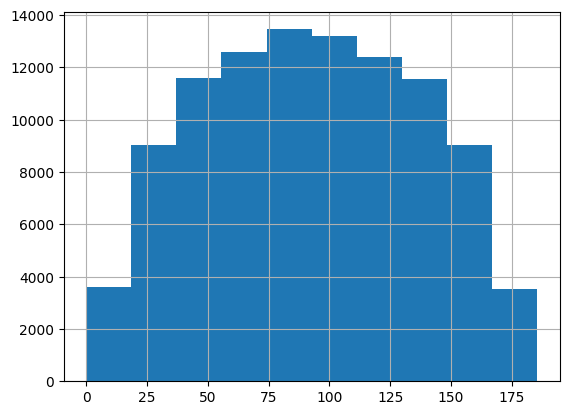


REGION 1: unidades por arriba del volumen de reservas minimas necesarias  = 16537
REGION 1 porcentaje = [0.16537]
valor maximo= 137.94540774090564


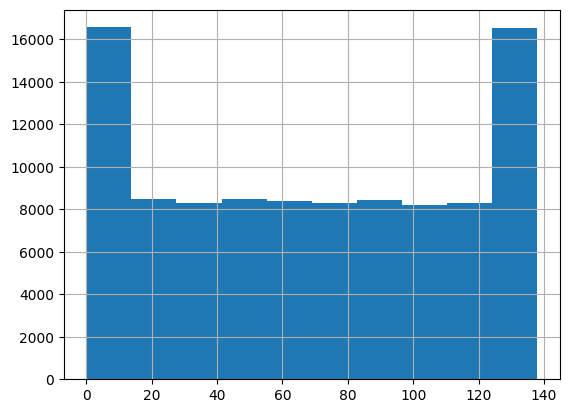


REGION 2: unidades por arriba del volumen de reservas minimas necesarias = 38178
REGION 2 porcentaje = [0.38178]
valor maximo= 190.0298383433513


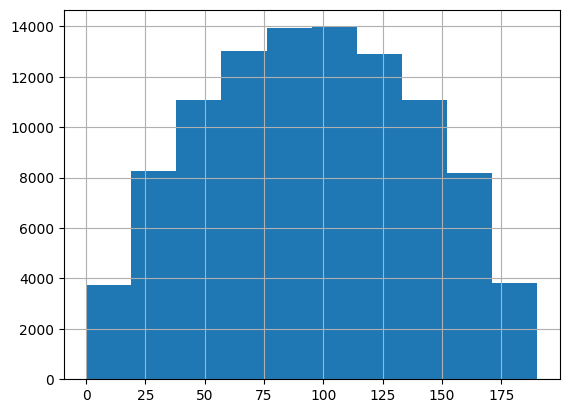

In [12]:
print('Volumen de reservas minimas necesarias para desarrollar un nuevo pozo:', vol_reserv_min )
print()
#REGION 0
affordable_Region_0=(product_0 >= 111.111).sum()
print('REGION 0: unidades por arriba del volumen de reservas minimas necesarias  =', affordable_Region_0)
print('REGION 0 porcentaje =',affordable_Region_0/product_0.shape )   
print('valor maximo=',product_0.max())
product_0.hist()
plt.show()
print()    
#REGION 1
affordable_Region_1=(product_1 >= 111.111).sum()
print('REGION 1: unidades por arriba del volumen de reservas minimas necesarias  =', affordable_Region_1)
print('REGION 1 porcentaje =',affordable_Region_1/product_1.shape ) 
print('valor maximo=',product_1.max()) 
product_1.hist()
plt.show()
print()
#REGION 2
affordable_Region_2=(product_2 >= 111.111).sum()
print('REGION 2: unidades por arriba del volumen de reservas minimas necesarias =', affordable_Region_2)
print('REGION 2 porcentaje =',affordable_Region_2/product_2.shape )  
print('valor maximo=',product_2.max())

product_2.hist() 
plt.show()                           

In [13]:
product_2.describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

### Conclusion intermedia

Se obtiene el Volumen Total de Reservas Minimas Necesarias (VTRM) 
para desarrollar un nuevo pozo es de: 111.11111111111111

REGION 0 
- Producto promedio = 92.50000000000001
- Desviacion estandar = 44.28
- Unidades por arriba del VTRMn = 36,583
- valor maximo= 185.3643474222929

REGION 1 
- Producto promedio = 68.82500000000002
- Desviacion estandar =  45.94
- Unidades por arriba del VTRMn = 16,537
- valor maximo= 137.94540774090564

REGION 2 
- Producto promedio = 95.00000000000004
- Desviacion estandar =  44.749921
- Unidades por arriba del VTRMn = 38178
- valor maximo= 190.0298383433513
 

Las gráficas de las REGION 0 y 2  son muy parecidas y eso se confirma ya que tanto el producto promedio como la desviacion y los valores maximos son muy parecidos.
 
Al ver la distribución de los valores de la REGION 1, podemos entender porque el modelo presenta RECM: 0.8958669435956541, su distribucion es muy pareja.
 

## 4. Cálculo de ganancias

In [14]:
def revenue(target, products, count):
    products_sorted = products.sort_values(ascending=False) 
    selected = target[products_sorted.index][:count] 
    return 4500 *sum(selected)-100000000 # gananicas - costo (100 millones para los mejores 200 pozos)

Región 0
Ganancia promedio: 4238972.379169059
Riesgo de pérdida: 0.048
Rango de confianza desde -761878.1389035935 hasta 9578465.319517836



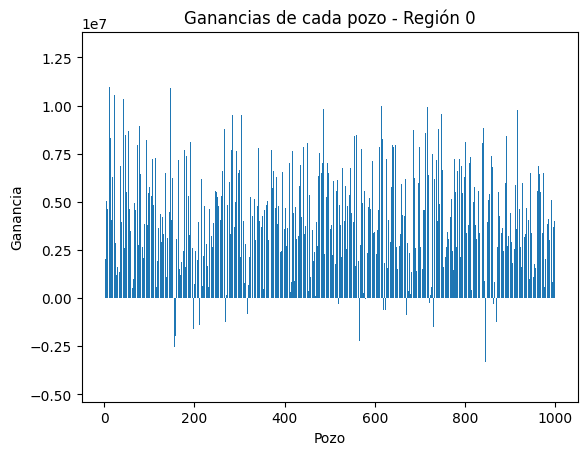

Región 1
Ganancia promedio: 5132566.989172833
Riesgo de pérdida: 0.006
Rango de confianza desde 1080668.9523397365 hasta 9285744.392325265



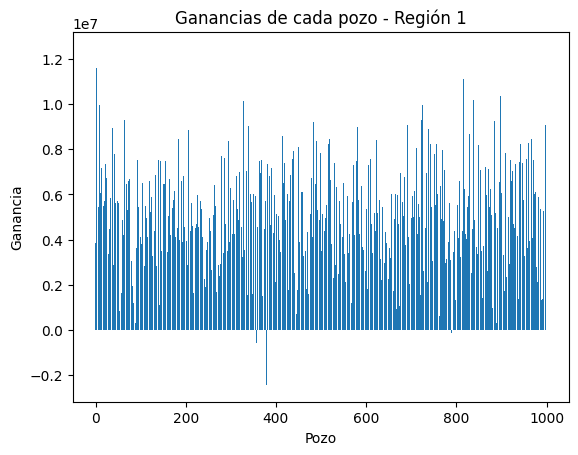

Región 2
Ganancia promedio: 3811203.595759012
Riesgo de pérdida: 0.074
Rango de confianza desde -1428006.300878744 hasta 8933805.657504013



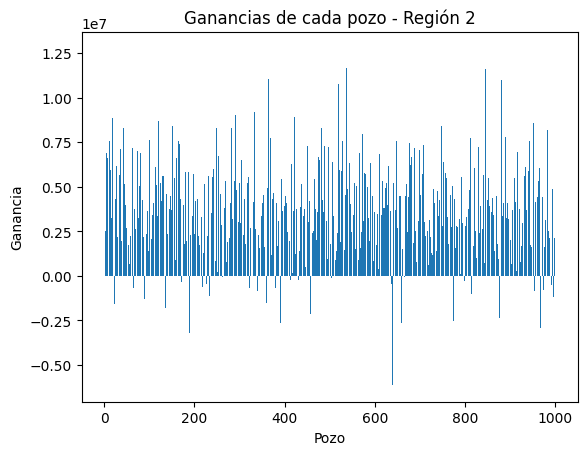

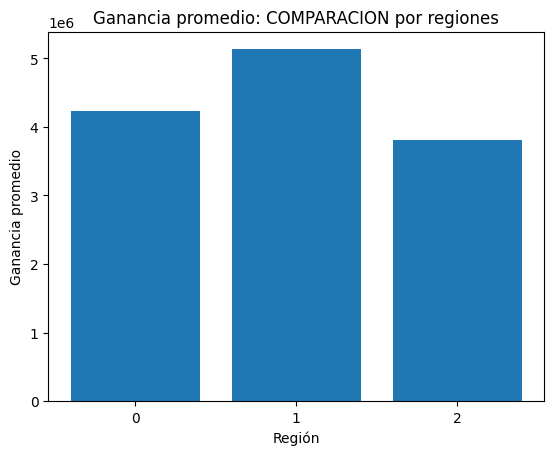

In [15]:
#Técnica bootstrapping con 1000 muestras para encontrar la distribución de las ganancias
bootstrap_samples = 1000 
n = 0 
mean_profits = []  # Lista para almacenar las ganancias promedio de cada región

for tar, pred in zip( targets, predictions):
    profits = []
    for i in range(bootstrap_samples):
        # submuestreo Objetivo con reemplazo = el tamaño de estudio de 500 puntos
        target_subsample = pd.Series(tar).sample(n=500, replace=True, random_state= state)
        # Se hacen las predicciones con el muestreo objetivo de los 500 puntos
        pred_subsample = pred[target_subsample.index]
        
        # Se calculan las ganancias con la seleccion de los 200 mejores puntos del submuetreo y las predicciones
        profits.append(revenue(target_subsample, pred_subsample, 200))
    # Transformar la lista de profits en una serie
    profits = pd.Series(profits)
    # Calcular la media
    mean = profits.mean()
    # Obtener intervalos de confianza
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    # Calcular la media de los datos negativos de la serie
    loss = (profits < 0).mean()
    
    print('Región', n)
    print('Ganancia promedio:', mean)
    print('Riesgo de pérdida:', loss)
    print('Rango de confianza desde', lower, 'hasta', upper)
    print()
    
    # Graficar las ganancias de cada pozo
    fig, ax = plt.subplots()
    ax.bar(range(len(profits)), profits)
    ax.set_xlabel('Pozo')
    ax.set_ylabel('Ganancia')
    ax.set_title('Ganancias de cada pozo - Región {}'.format(n))
    plt.show()
    
    mean_profits.append(mean)
    
    n += 1

# Comparación final de ganancia por región
fig, ax = plt.subplots()
regions = np.arange(len(mean_profits))
ax.bar(regions, mean_profits)
ax.set_xlabel('Región')
ax.set_ylabel('Ganancia promedio')
ax.set_title('Ganancia promedio: COMPARACION por regiones')
ax.set_xticks(regions)
plt.show()

## Conclusion Intermedia
Se identifica que la Region 1 es la mejor opcion para el desarrollo de pozo.
 

Región 0
- Ganancia promedio: 4,250,638.562352966
- Riesgo de pérdida: 0.062
- Rango de confianza desde -1202243.16217706 hasta 9825548.633446794

Región 1
- Ganancia promedio: 5,163,314.232693729
- Riesgo de pérdida: 0.005
- Rango de confianza desde 1171216.3594474369 hasta 9600024.599272326

Región 2
- Ganancia promedio: 3,646,019.9108492346
- Riesgo de pérdida: 0.097
- Rango de confianza desde -1619638.6069313772 hasta 9295097.313283792

## Conclusion

El procedimiento constó en identificar las tres características significativas de los puntos f0, f1, f2, y prepararlas para el modelo.
Al aplicar el modelo de regresion lineal, obtuvimos la correcta prediccion de los productos promedios de reservas para las tres regiones.
El modelo obtuvo el menor valor de error de prediccion de =0.889736773768065 en la region 1.

El valor de volumen de reservas minimas necesarias para un nuevo pozo  a considerar es de 111.11 volumenes
REGION 0 
- Producto promedio = 92.50000000000001
- Desviacion estandar = 44.28
- Unidades por arriba del VTRMn = 36,583
- valor maximo= 185.3643474222929

REGION 1 
- Producto promedio = 68.82500000000002
- Desviacion estandar =  45.94
- Unidades por arriba del VTRMn = 16,537
- valor maximo= 137.94540774090564

REGION 2 
- Producto promedio = 95.00000000000004
- Desviacion estandar =  44.749921
- Unidades por arriba del VTRMn = 38178
- valor maximo= 190.0298383433513

El producto promedio de cada region no sobrepasa los 111.11 volumenes requeridnos.
La Region 0 y 2 sobrepasan en un 36% y 38% respectivamente.
La Region 1 en un 16% 

Ahora haciendo un muestreo de 1000 para encontrar la region con la distribucion más rentable.
Considerando un submuestreo con reemplazo de 500 pozos para las 3 regiones para obtener de cada una de ellas los mejores 200 puntos y un intervalo de confianza del 95%

La REGION 1 es la region más redituable, y con el menor riesgo de pérdida.
Región 1
- Ganancia promedio: 5,163,314.232693729
- Riesgo de pérdida: 0.005
- Rango de confianza desde 1171216.3594474369 hasta 9600024.599272326

Por lo anterior se recomienda a Oil Giant la Region 1 para su nuevo pozo.

